# Image Classification Using CNN
By : Rafiq 

In [1]:
import pandas as pd # type: ignore
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint 
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
import pickle
import random




In [2]:
### dataset paths

dataset = 'Dataset'
trainpath = 'HMBD v1 dataset/trainpath'
testpath = 'HMBD v1 dataset/testpath'
predpath = 'HMBD v1 dataset/predpath'
md_file_path = 'info.md'

In [3]:
code = {
    'Ain_End': 0,
    'Ain_Isolated': 1,
    'Ain_Middle': 2,
    'Ain_Start': 3,
    'Alf_End': 4,
    'Alf_Hamza_Above_End': 5,
    'Alf_Hamza_Above_Isolated': 6,
    'Alf_Hamza_Under_End': 7,
    'Alf_Hamza_Under_Isolated': 8,
    'Alf_Isolated': 9,
    'Baa_End': 10,
    'Baa_Isolated': 11,
    'Baa_Middle': 12,
    'Baa_Start': 13,
    'Daad_End': 14,
    'Daad_Isolated': 15,
    'Daad_Middle': 16,
    'Daad_Start': 17,
    'Dal_End': 18,
    'Dal_Isolated': 19,
    'Faa_End': 20,
    'Faa_Isolated': 21,
    'Faa_Middle': 22,
    'Faa_Start': 23,
    'Gem_End': 24,
    'Gem_Isolated': 25,
    'Gem_Start': 26,
    'Gen_End': 27,
    'Gen_Isolated': 28,
    'Gen_Middle': 29,
    'Ha_End': 30,
    'Ha_Isolated': 31,
    'Ha_Middle': 32,
    'Ha_Start': 33,
    'Haa_End': 34,
    'Haa_Isolated': 35,
    'Haa_Start': 36,
    'Hamza_Isolated': 37,
    'Kaf_End': 38,
    'Kaf_Isolated': 39,
    'Kaf_Middle': 40,
    'Kaf_Start': 41,
    'Khaa_End': 42,
    'Khaa_Isolated': 43,
    'Khaa_Start': 44,
    'Lam_Alf_End': 45,
    'Lam_Alf_Hamza_End': 46,
    'Lam_Alf_Hamza_Isolated': 47,
    'Lam_Alf_Isolated': 48,
    'Lam_Alf_Mad_End': 49,
    'Lam_Alf_Mad_Isolated': 50,
    'Lam_End': 51,
    'Lam_Isolated': 52,
    'Lam_Middle': 53,
    'Lam_Start': 54,
    'Mem_End': 55,
    'Mem_Isolated': 56,
    'Mem_Start': 57,
    'Non_End': 58,
    'Non_Isolated': 59,
    'Non_Middle': 60,
    'Non_Start': 61,
    'Qaf_End': 62,
    'Qaf_Isolated': 63,
    'Qaf_Middle': 64,
    'Qaf_Start': 65,
    'Raa_End': 66,
    'Raa_Isolated': 67,
    'Saad_End': 68,
    'Saad_Isolated': 69,
    'Saad_Middle': 70,
    'Saad_Start': 71,
    'Shen_End': 72,
    'Shen_Isolated': 73,
    'Shen_Middle': 74,
    'Shen_Start': 75,
    'Sin_End': 76,
    'Sin_Isolated': 77,
    'Sin_Middle': 78,
    'Sin_Start': 79,
    'Taa_End': 80,
    'Taa_Isolated': 81,
    'Taa_Middle': 82,
    'Taa_Start': 83,
    'Tah_Isolated': 84,
    'Tah_Middle': 85,
    'Thaa_End': 86,
    'Thaa_Isolated': 87,
    'Thaa_Middle': 88,
    'Thaa_Start': 89,
    'Waw_End': 90,
    'Waw_Hamza_Isolated': 91,
    'Waw_Isolated': 92,
    'Yaa_Dot_End': 93,
    'Yaa_Dot_Isolated': 94,
    'Yaa_Dot_Start': 95,
    'Yaa_End': 96,
    'Yaa_Isolated': 97,
    'Yaa_Middle': 98,
    'Zah_Isolated': 99,
    'Zah_Middle': 100,
    'Zal_End': 101,
    'Zal_Isolated': 102,
    'Zin_End': 103,
    'Zin_Isolated': 104
}



def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [6]:
s=32


In [7]:
# X_train = []
# y_train = []
# for folder in  os.listdir(trainpath) : 
#     files = gb.glob(pathname= str( trainpath +'/' + folder + '/*.jpg'))
#     for file in files: 
#         image = cv2.imread(file)
#         image_array = cv2.resize(image , (s,s))
#         X_train.append(list(image_array))
#         y_train.append(code[folder])

# #  now how many items in X_train 
# print(f'we have {len(X_train)} items in X_train') 

we have 32304 items in X_train


In [7]:
# plt.figure(figsize=(12,12))
# for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
#     plt.subplot(6,6,n+1)
#     plt.imshow(X_train[i])   
#     plt.axis('off')
#     plt.title(getcode(y_train[i]))

In [8]:
# X_test = []
# y_test = []
# for folder in  os.listdir(testpath) : 
#     files = gb.glob(pathname= str(testpath + '/' + folder + '/*.jpg'))
#     for file in files: 
#         image = cv2.imread(file)
#         image_array = cv2.resize(image , (s,s))
#         X_test.append(list(image_array))
#         y_test.append(code[folder])

# print(f'we have {len(X_test)} items in X_test')

we have 11297 items in X_test


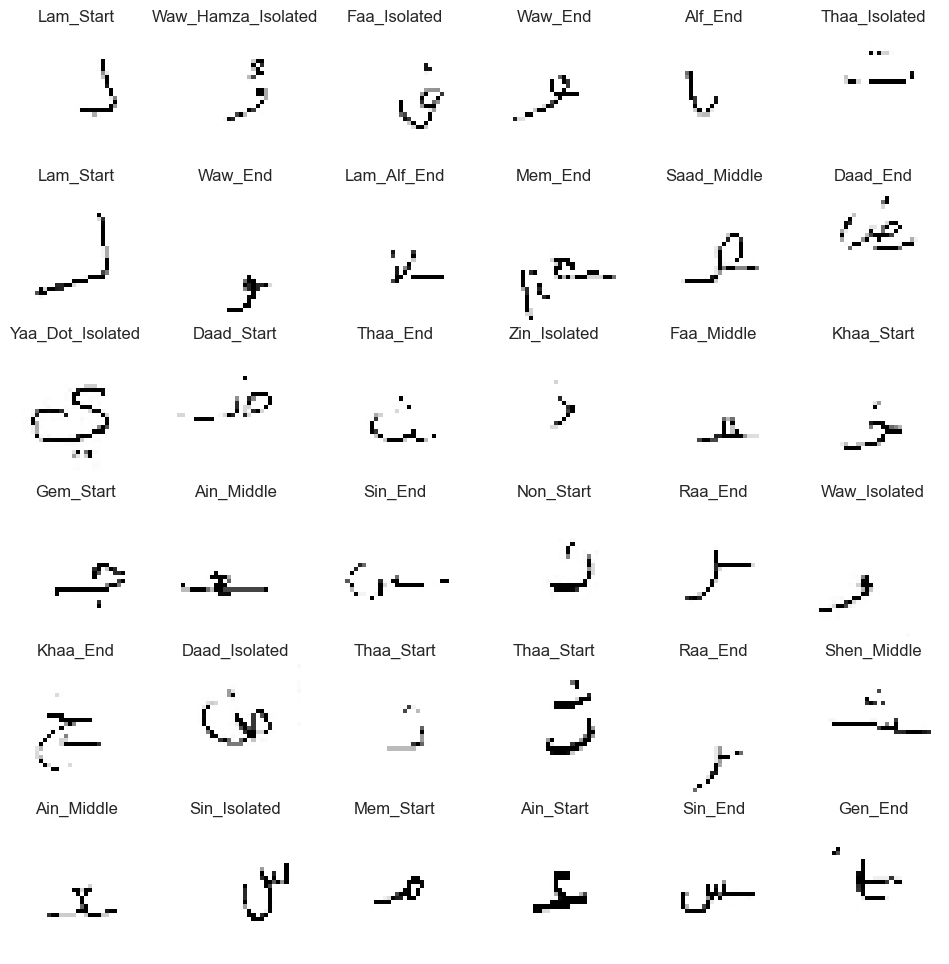

In [9]:
# plt.figure(figsize=(12,12))
# for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
#     plt.subplot(6,6,n+1)
#     plt.imshow(X_test[i])    
#     plt.axis('off')
#     plt.title(getcode(y_test[i]))

In [10]:
# X_pred = []
# files = gb.glob(pathname= str(predpath + '/*.jpg'))
# for file in files: 
#     image = cv2.imread(file)
#     image_array = cv2.resize(image , (s,s))
#     X_pred.append(list(image_array))     
# print(f'we have {len(X_pred)} items in X_pred')  

we have 5830 items in X_pred


In [11]:
# plt.figure(figsize=(12,12))
# for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
#     plt.subplot(6,6,n+1)
#     plt.imshow(X_pred[i])    
#     plt.axis('off')

In [11]:
# # import pickle
# # save images array data
# pickle_out=open("dataSave/x_train.pickle","wb")
# pickle.dump(X_train,pickle_out)


# pickle_out=open("dataSave/y_train.pickle","wb")
# pickle.dump(y_train,pickle_out)


# pickle_out=open("dataSave/x_test.pickle","wb")
# pickle.dump(X_test,pickle_out)


# pickle_out=open("dataSave/y_test.pickle","wb")
# pickle.dump(y_test,pickle_out)

# pickle_out=open("dataSave/X_pred.pickle","wb")
# pickle.dump(X_pred,pickle_out)



In [13]:

# load images array data

pickle_in=open("dataSave/x_train.pickle","rb")
X_train= pickle.load(pickle_in)


pickle_in=open("dataSave/y_train.pickle","rb")
y_train= pickle.load(pickle_in)
 

pickle_in=open("dataSave/x_test.pickle","rb")
X_test= pickle.load(pickle_in)


pickle_in=open("dataSave/y_test.pickle","rb")
y_test= pickle.load(pickle_in)

pickle_in=open("dataSave/X_pred.pickle","rb")
X_pred= pickle.load(pickle_in)



In [14]:

# تجميع القوائم X_train و y_train معًا
combined = list(zip(X_train, y_train))
random.shuffle(combined)#خلط
X_train, y_train= zip(*combined)#فصل بعد الخلط


combined = list(zip(X_test, y_test))
random.shuffle(combined) 
X_test, y_test= zip(*combined) 

random.shuffle(X_pred) 



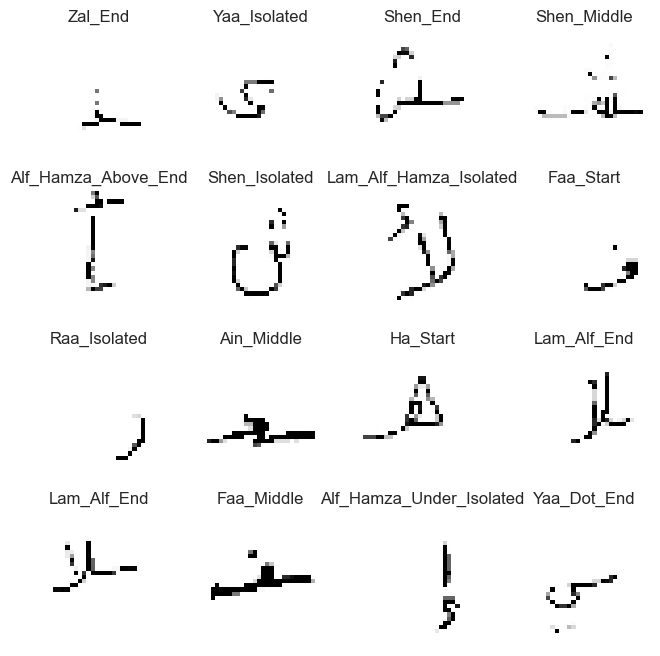

In [15]:
plt.figure(figsize=(8,8))
for n , i in enumerate(list(np.random.randint(0,len(X_test),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))
    
# plt.figure(figsize=(8,8))
# for n , i in enumerate(list(np.random.randint(0,len(X_train),16))) : 
#     plt.subplot(4,4,n+1)
#     plt.imshow(X_train[i])    
#     plt.axis('off')
#     plt.title(getcode(y_train[i]))
    
# plt.figure(figsize=(8,8))
# for n , i in enumerate(list(np.random.randint(0,len(X_pred),16))) : 
#     plt.subplot(4,4,n+1)
#     plt.imshow(X_pred[i])    
#     plt.axis('off')

In [16]:
# convert to array with normalize [0,1]

# X_train = keras.utils.normalize(np.array(X_train),axis=1)
# X_test = keras.utils.normalize(np.array(X_test),axis=1)
# X_pred_array = keras.utils.normalize(np.array(X_pred),axis=1)
# y_train = np.array(y_train)
# y_test = np.array(y_test)
 

# convert to array without normalize 
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)


print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (32304, 32, 32, 3)
X_test shape  is (11297, 32, 32, 3)
X_pred shape  is (5830, 32, 32, 3)
y_train shape  is (32304,)
y_test shape  is (11297,)


In [16]:

# checkpoint_filepath='weights-improvement--{epoch:02d}-{val_accuray:.2f}.hdf5' #لعمل عددة ملفات حسب الدقة والايبوك
checkpoint_filepath='dataSave/weights.best.hdf5' # or 'best_model.hdf5' any name
checkpoint=ModelCheckpoint(filepath=checkpoint_filepath,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
tensorBoard=TensorBoard(log_dir='dataSave/model_logs',histogram_freq=1,write_graph=True,write_images=True) 
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5) # اذا وصلت الى اقل قيمة للوس زيد 10 دورات اذا قلت قيمة اللوس كمل دورات التدريب واذا زادت قيمة اللوس وقف التدريب

callbacks_list=[checkpoint,tensorBoard,es]


 

In [ ]:
KerasModel = keras.models.Sequential([
    keras.layers.Conv2D(16, kernel_size=(9, 9), activation='relu', input_shape=(s, s, 3)),
    keras.layers.Conv2D(16, kernel_size=(9, 9), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=2), 
 
    keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),
    keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),
    keras.layers.BatchNormalization(),  
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=1), 
 
    keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu'),
    keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu'),
    keras.layers.BatchNormalization(),  
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=1), 
    
    keras.layers.Flatten(),  
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(105, activation='softmax')
])

# save_model=keras.models.load_model("dataSave/epoch15_best_model.hdf5")
# KerasModel.load_wieghts("dataSave/epoch15_best_model.hdf5")
 

In [17]:
KerasModel = keras.models.Sequential([
    keras.layers.Conv2D(16, kernel_size=(16, 16), activation='relu', input_shape=(s, s, 3)),
    keras.layers.Conv2D(16, kernel_size=(16, 16), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=2), 
    
    keras.layers.Conv2D(32, kernel_size=(8, 8), activation='relu'),
    keras.layers.Conv2D(48, kernel_size=(6, 6), activation='relu'),
    keras.layers.BatchNormalization(),  
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=1), 
    keras.layers.Flatten(), #768 
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(105, activation='softmax')
])

# save_model=keras.models.load_model("dataSave/epoch15_best_model.hdf5")
# KerasModel.load_wieghts("dataSave/epoch15_best_model.hdf5")
 

: 

In [18]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 49, 49, 16)        12304     
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 16)        65552     
                                                                 
 batch_normalization_2 (Batc  (None, 34, 34, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 32)        32800     
                                                                 
 conv2d_7 (Conv2D)           (Non

_________________________________________________________________
None


now to train the model , lets use 50 epochs now

In [19]:
epochs =15
# history=KerasModel.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,verbose=1,callbacks=callbacks_list)

# ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,callbacks=callbacks_list,verbose=1)

Epoch 1/15
505/505 [==============================] - 461s 910ms/step - loss: 3.3263 - accuracy: 0.1837
Epoch 2/15
505/505 [==============================] - 500s 991ms/step - loss: 2.1951 - accuracy: 0.3765
Epoch 3/15
505/505 [==============================] - 490s 970ms/step - loss: 1.7836 - accuracy: 0.4720
Epoch 4/15
505/505 [==============================] - 513s 1s/step - loss: 1.5728 - accuracy: 0.5286
Epoch 5/15
505/505 [==============================] - 497s 984ms/step - loss: 1.3950 - accuracy: 0.5712
Epoch 6/15
505/505 [==============================] - 476s 942ms/step - loss: 1.2836 - accuracy: 0.6011
Epoch 7/15
505/505 [==============================] - 458s 906ms/step - loss: 1.1775 - accuracy: 0.6271
Epoch 8/15
505/505 [==============================] - 461s 912ms/step - loss: 1.0711 - accuracy: 0.6597
Epoch 9/15
505/505 [==============================] - 451s 892ms/step - loss: 0.9810 - accuracy: 0.6811
Epoch 10/15
505/505 [==============================] - 441s 874ms/s

In [ ]:


def plot_loss_accuracy(history):
  # Loss Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

  # Accuracy Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['acc'],'r',linewidth=3.0)
  plt.plot(history.history['val_acc'],'b',linewidth=3.0)
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16) 

In [11]:
# KerasModel.save("dataSave/epoch15_best_model.hdf5")
# save_model=keras.models.load_model("dataSave/epoch15_best_model.hdf5")
 

In [1]:
# when load model from save file must be compile it
KerasModel=keras.models.load_model("dataSave/epoch15_best_model.hdf5")
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print('Model Details are : ')
print(KerasModel.summary())

NameError: name 'keras' is not defined

how is the final loss & accuracy


In [14]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)
# ModelLoss, ModelAccuracy = save_model.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

354/354 [==============================] - 11s 29ms/step - loss: 4.6540 - accuracy: 0.0089
Test Loss is 4.65399694442749
Test Accuracy is 0.008940426632761955


In [24]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

354/354 [==============================] - 10s 27ms/step
Prediction Shape is (11297, 105)


great

now it's time to redict X Predict

In [25]:
y_result = KerasModel.predict(X_pred_array)
print('Prediction Shape is {}'.format(y_result.shape))

183/183 [==============================] - 5s 26ms/step
Prediction Shape is (5830, 105)


In [1]:
print(getcode(np.argmax(y_result[:11])))

NameError: name 'getcode' is not defined

and to show random redicted pictures & its predicting category


In [26]:
plt.figure(figsize=(12,12))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))
    
    plt.figure(figsize=(12,12))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

: 